In [1]:
# 魔法函數（Magic Functions）: 可以將matplotlib的圖表直接嵌入到Notebook之中
%matplotlib notebook

## 9.1 matplotlib API概觀

In [ ]:
# 完整繪圖型態目錄
# https://matplotlib.org/stable/gallery/index.html

In [2]:
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

### 圖和子圖

<IPython.core.display.Javascript object>


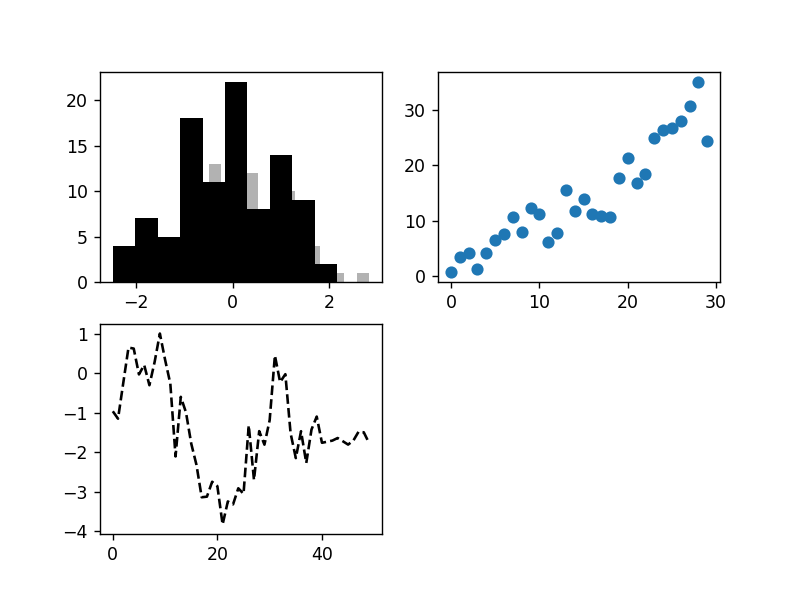

In [7]:
# 建立新的圖
fig = plt.figure()

In [8]:
# 命令其被規劃成四張子圖(2*2)，並從第一張子圖開始建立
ax1 = fig.add_subplot(2, 2, 1)

In [9]:
ax2 = fig.add_subplot(2, 2, 2)

In [10]:
ax3 = fig.add_subplot(2, 2 ,3)

In [15]:
# matplotlib會在最近一個被使用的圖中作畫
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [17]:
# 直接在對應的空白子圖上畫圖
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)

In [18]:
ax2.scatter(np.arange(30), np.arange(30)+3*np.random.randn(30))

<IPython.core.display.Javascript object>


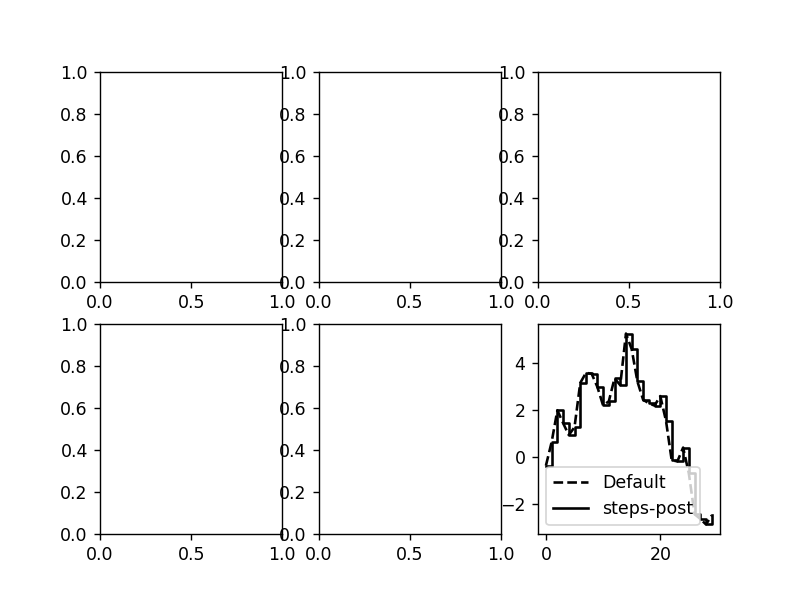

In [19]:
# 便利法: plt.subplots
fig, axes = plt.subplots(2, 3)

In [20]:
axes

array([[<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

In [22]:
fig

<IPython.core.display.Javascript object>

### 調整子圖間留白

In [25]:
# Signature:
# plt.subplots_adjust(
#     left=None,
#     bottom=None,
#     right=None,
#     top=None,
#     wspace=None,
#     hspace=None,
# )

<IPython.core.display.Javascript object>


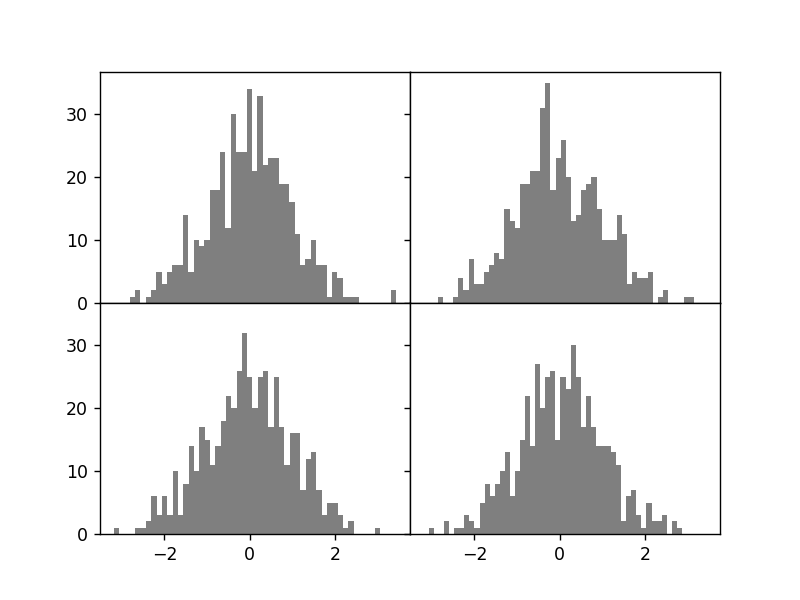

In [49]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### 色彩、標示和線條樣式

In [32]:
plt.plot?

<IPython.core.display.Javascript object>


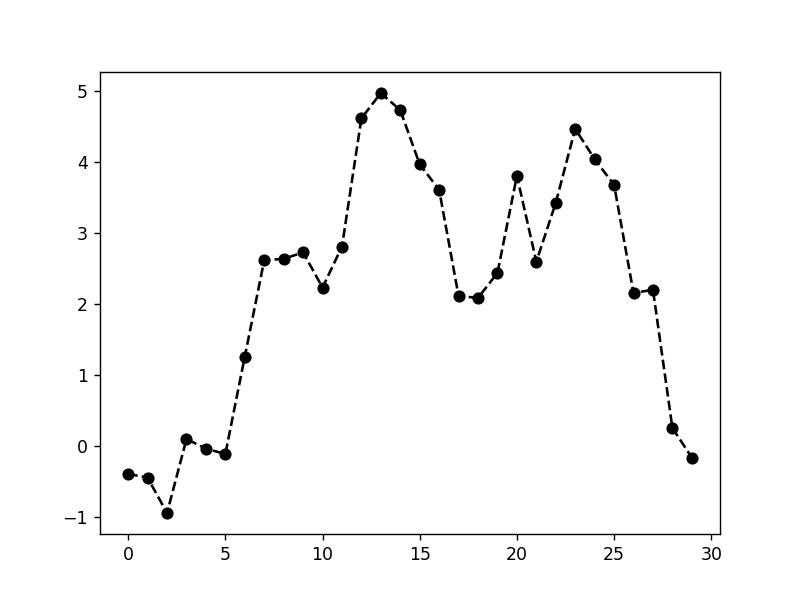

In [50]:
from numpy.random import randn
fig = plt.subplots()

plt.plot(randn(30).cumsum(), 'ko--')
# plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

<IPython.core.display.Javascript object>


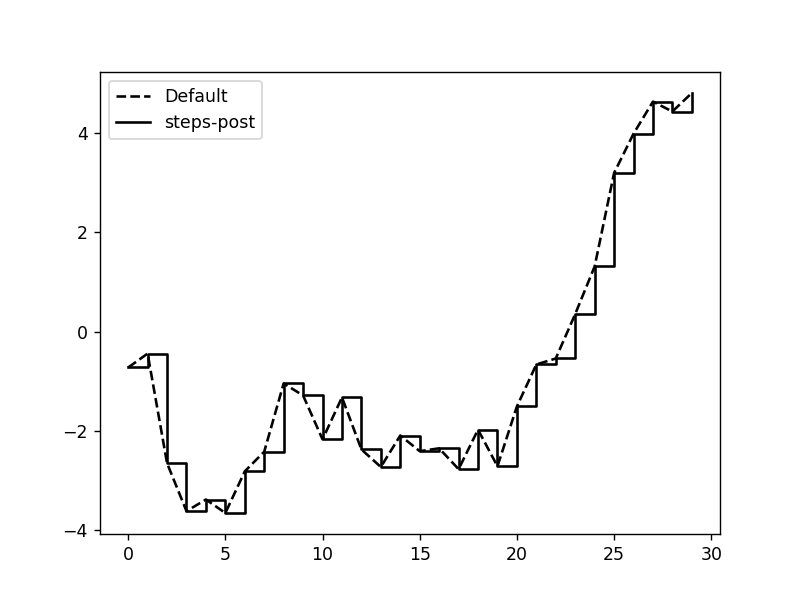

In [51]:
fig = plt.subplots()
data = np.random.randn(30).cumsum()

In [52]:
plt.plot(data, 'k--', label='Default')

In [53]:
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')

In [54]:
plt.legend(loc='best')

### 設定主題、軸標籤、刻度和刻度標籤

<IPython.core.display.Javascript object>


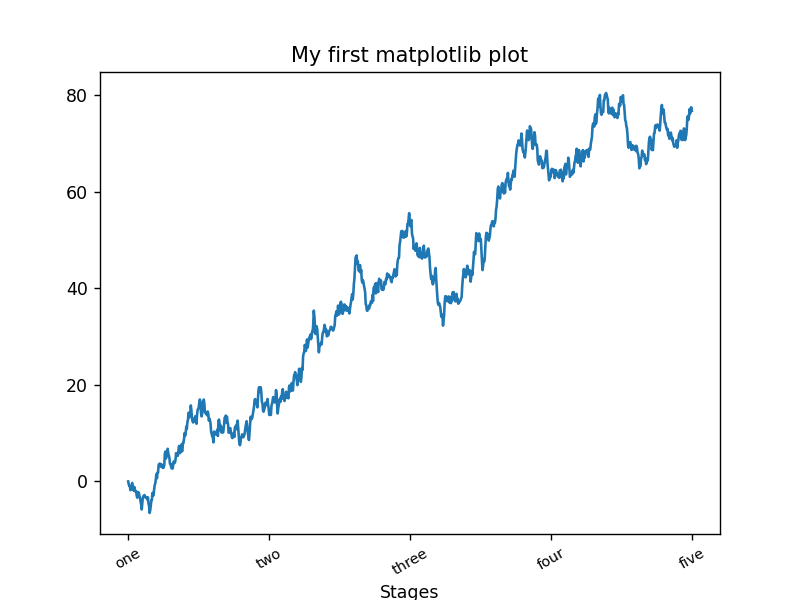

In [55]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

In [56]:
# 在哪裡放置刻度? 標籤所在位置
ticks = ax.set_xticks([0, 250, 500, 750, 1000])

In [57]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'], rotation=30, fontsize='small')

# rotation: 軸標籤旋轉30度

In [58]:
# 設置子圖主題
ax.set_title('My first matplotlib plot')

Text(0.5, 1.0, 'My first matplotlib plot')

In [61]:
# 設置軸名稱
ax.set_xlabel('Stages')

Text(0.5, 15.528422124795624, 'Stages')

In [63]:
# 其他等效寫法：
# props = {
#     'title': 'My first matplotlib plot',
#     'xlabel': 'Stages'
# }
# ax.set(**props)

[Text(0.5, 1.0, 'My first matplotlib plot'),
 Text(0.5, 15.528422124795624, 'Stages')]

### 加入圖例

<IPython.core.display.Javascript object>


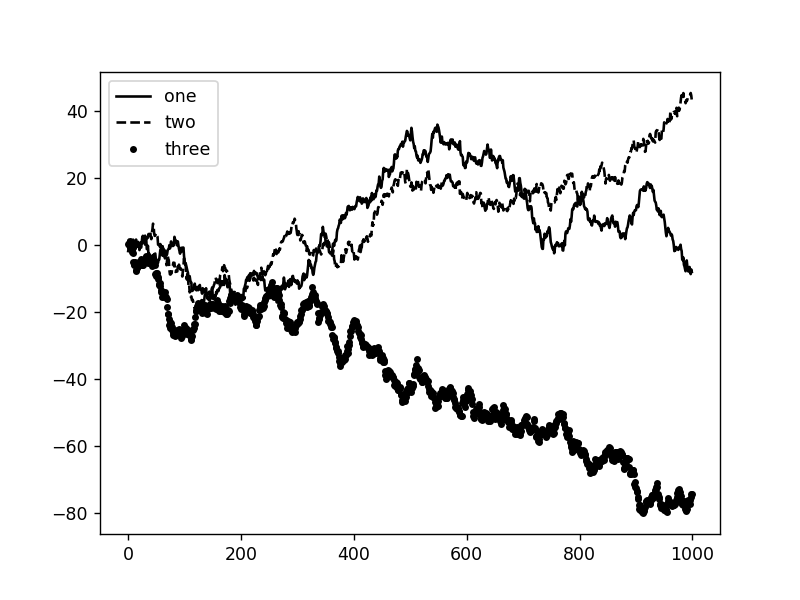

In [16]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)

In [17]:
ax.plot(randn(1000).cumsum(), 'k', label='one')

In [18]:
ax.plot(randn(1000).cumsum(), 'k--', label='two')

In [19]:
ax.plot(randn(1000).cumsum(), 'k.', label='three')

In [20]:
ax.legend(loc='best')

In [22]:
ax.legend?  # 放置圖例

### 注釋與畫圖形

In [24]:
import requests

In [28]:
request_url = "https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/spx.csv"
resp = requests.get(request_url)
# print(resp.status_code)
# print(resp.text)

resp_text = resp.text
file_name = request_url.split("/")[-1]

f = open(file_name, 'w')
f.write(resp_text)
f.close

<function TextIOWrapper.close()>

<IPython.core.display.Javascript object>


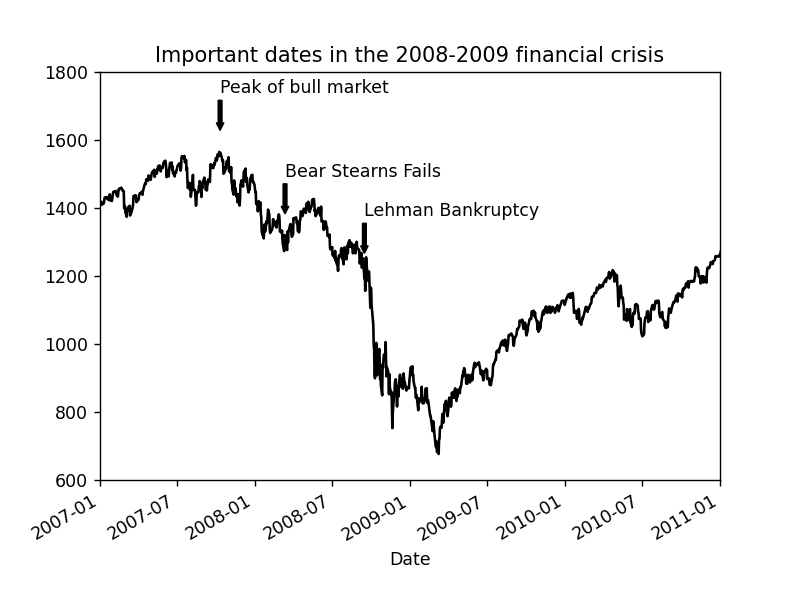

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

In [37]:
from datetime import datetime

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

data = pd.read_csv('examples/spx.csv', index_col = 0, parse_dates = True)
# data.columns
spx = data['SPX']

spx.plot(ax=ax, style='k-')

crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label,
                xy = (date, spx.asof(date)+75),       # 被註釋的座標點
                xytext = (date, spx.asof(date)+225),  # 註釋文字的座標點
                arrowprops = dict(facecolor='black', headwidth=4, width=2, headlength=4),
                horizontalalignment = 'left',
                verticalalignment = 'top')
    
# 只看2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Important dates in the 2008-2009 financial crisis')

<IPython.core.display.Javascript object>


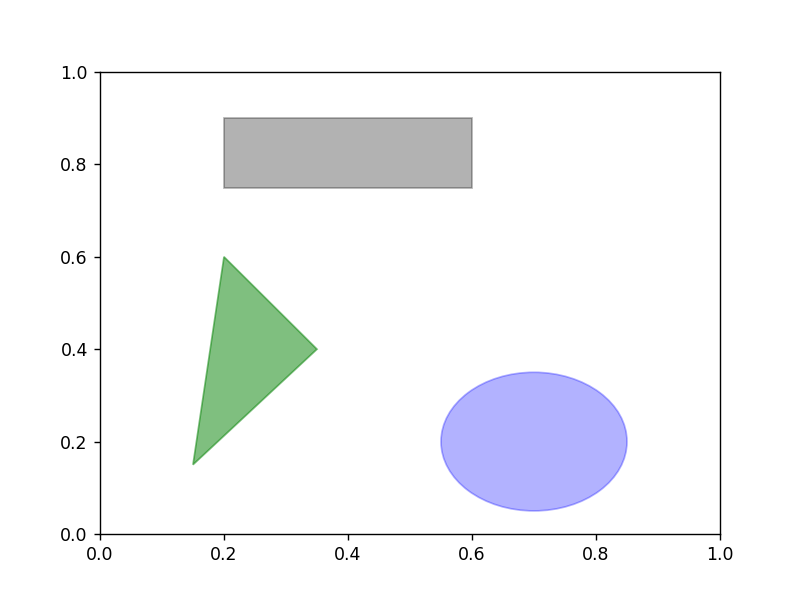

In [43]:
# 畫圖形
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]], color='g', alpha=0.5)

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### 把圖存檔

In [45]:
# plt.savefig('figpath.svg')
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

### matplotlib 設定

In [46]:
# 預設圖形大小變成 10* 10
plt.rc('figure', figsize=(10, 10))

---

## 9.2 用pandas和seaborn繪圖

<IPython.core.display.Javascript object>


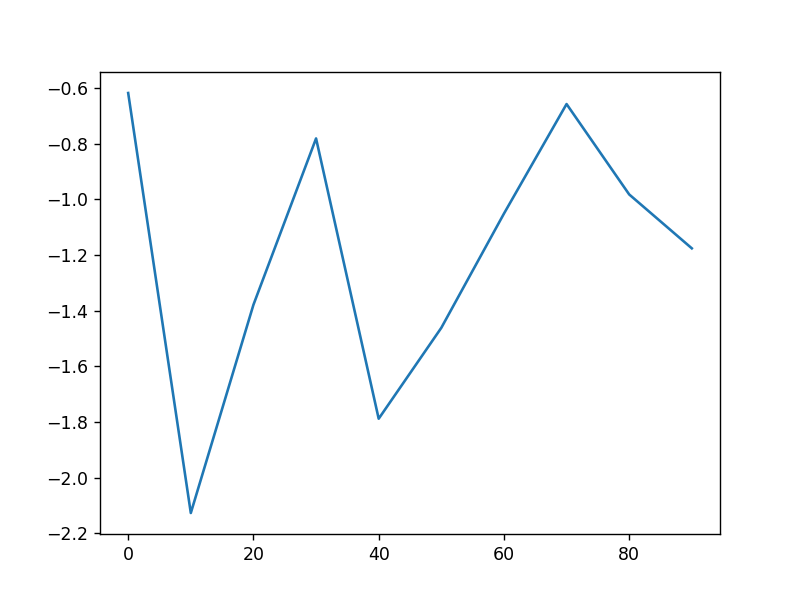

<AxesSubplot:>

In [5]:
# Series. DataFrame 有自己的 plot 屬性，繪製基本型態的圖
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot()

<IPython.core.display.Javascript object>


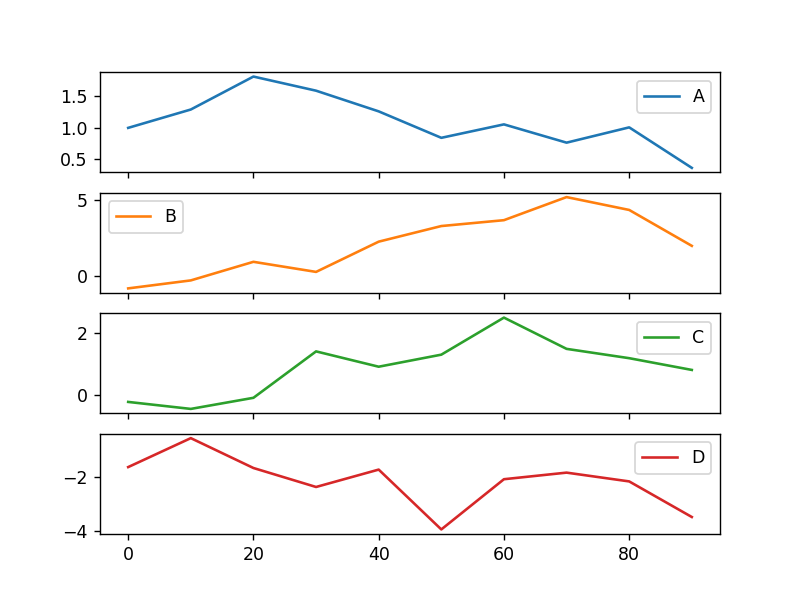

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
      dtype=object)

In [8]:
# DataFrame 有自己的 plot 屬性，可以把欄的值分別畫線
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns = ['A', 'B', 'C', 'D'],
                  index = np.arange(0, 100, 10))       # x軸刻度
# df.plot()
df.plot(subplots = True)

### 長條圖

<IPython.core.display.Javascript object>


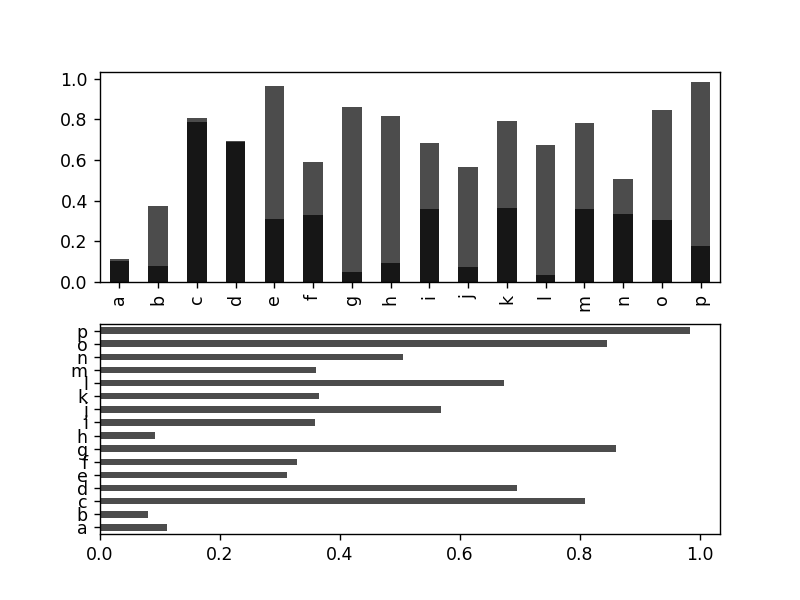

In [9]:
fig, axes = plt.subplots(2, 1)

In [13]:
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))

# 垂直長條圖
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
# 水平長條圖
data.plot.barh(ax=axes[1], color='k', alpha=0.7)


<AxesSubplot:>

In [16]:
# DataFrame 會以一列中的多值當成一個群組
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'fove', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))   # Genus:圖例標題
df

Genus,A,B,C,D
one,0.314688,0.338916,0.119381,0.806298
two,0.460880,0.368707,0.732918,0.021363
three,0.913305,0.053773,0.787919,0.251854
four,0.270869,0.390754,0.628082,0.805770
fove,0.384126,0.369388,0.467224,0.616614
six,0.391540,0.413479,0.461405,0.616332


<IPython.core.display.Javascript object>


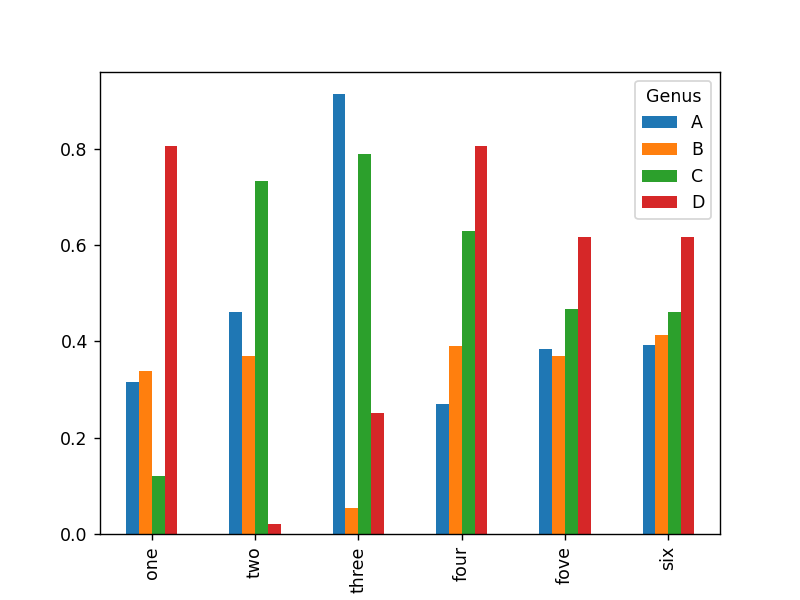

<AxesSubplot:>

In [17]:
df.plot.bar()

<IPython.core.display.Javascript object>


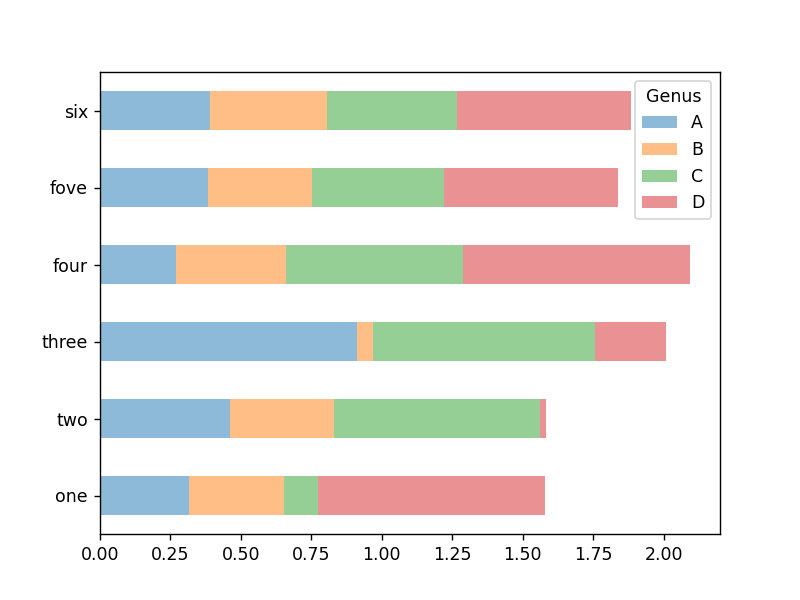

<AxesSubplot:>

In [45]:
# 將長條疊在一起
df.plot.barh(stacked=True, alpha=0.5)

In [30]:
request_url = "https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/tips.csv"
resp = requests.get(request_url)
# print(resp.status_code)
# print(resp.text)

resp_text = resp.text
file_name = request_url.split("/")[-1]

f = open(file_name, 'w')
f.write(resp_text)
f.close

<function TextIOWrapper.close()>

In [5]:
tips = pd.read_csv('examples/tips.csv')

In [33]:
party_counts = pd.crosstab(tips['day'], tips['size'])  # 星期幾 & 用餐人數
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [34]:
# 去除 1和 6人用餐人數的情況
party_counts = party_counts.loc[:, 2:5]

In [35]:
# 正規化到加總為 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)   # axis{0 or ‘index’, 1 or ‘columns’}  # div: 反向版除以常數
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


<IPython.core.display.Javascript object>


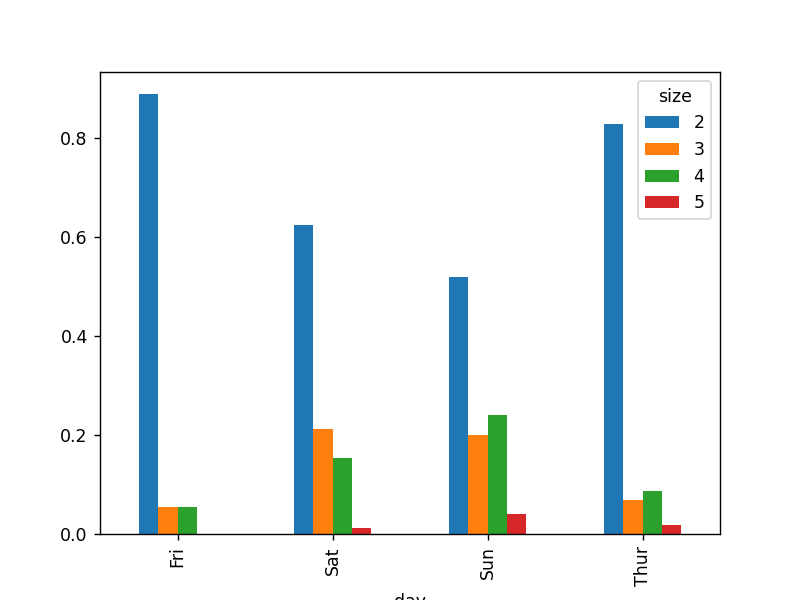

<AxesSubplot:xlabel='day'>

In [55]:
party_pcts.plot.bar()

In [15]:
# seaborn
import seaborn as sns

In [42]:
tips[:3]

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3


In [6]:
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


<IPython.core.display.Javascript object>


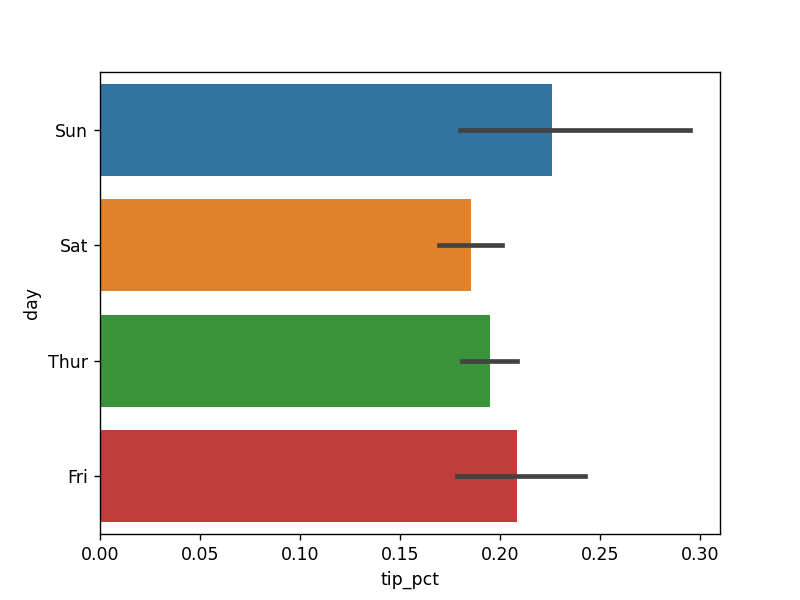

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [59]:
fig, axes = plt.subplots(1, 1)
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

# 因為每個 day會有多個觀察值，所以 tip_pct 是平均值

<IPython.core.display.Javascript object>


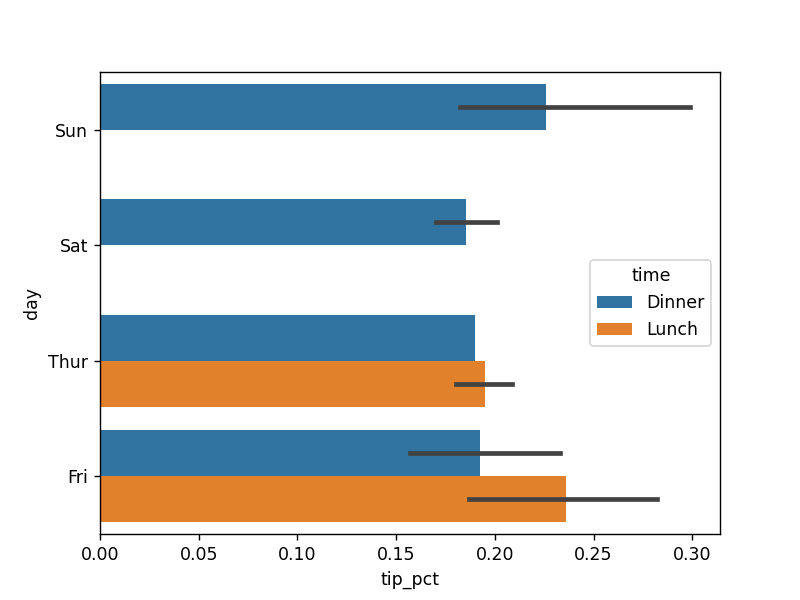

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [60]:
fig, axes = plt.subplots(1, 1)
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

# hue: 區分其他類別的值

In [61]:
# 調整繪圖的外觀
sns.set(style="whitegrid")

<IPython.core.display.Javascript object>


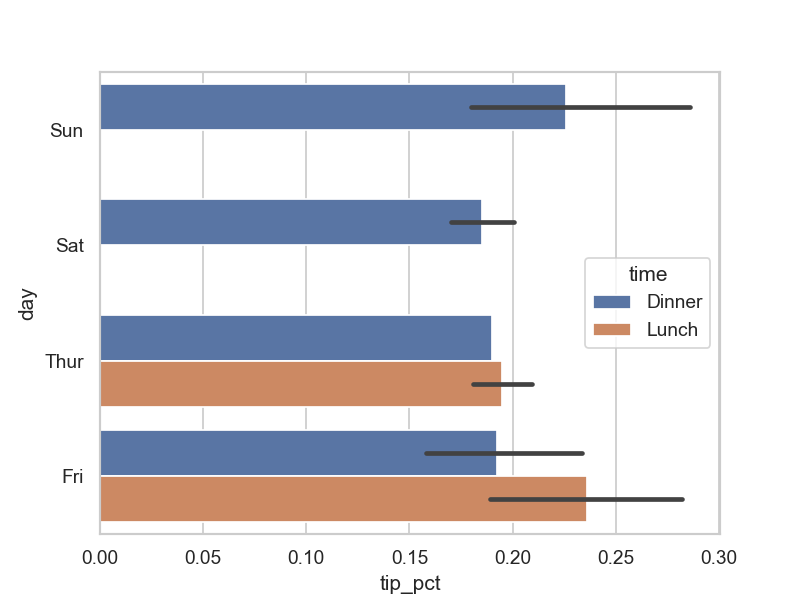

<AxesSubplot:xlabel='tip_pct', ylabel='day'>

In [62]:
fig, axes = plt.subplots(1, 1)
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

### 直方圖和密度圖

<IPython.core.display.Javascript object>


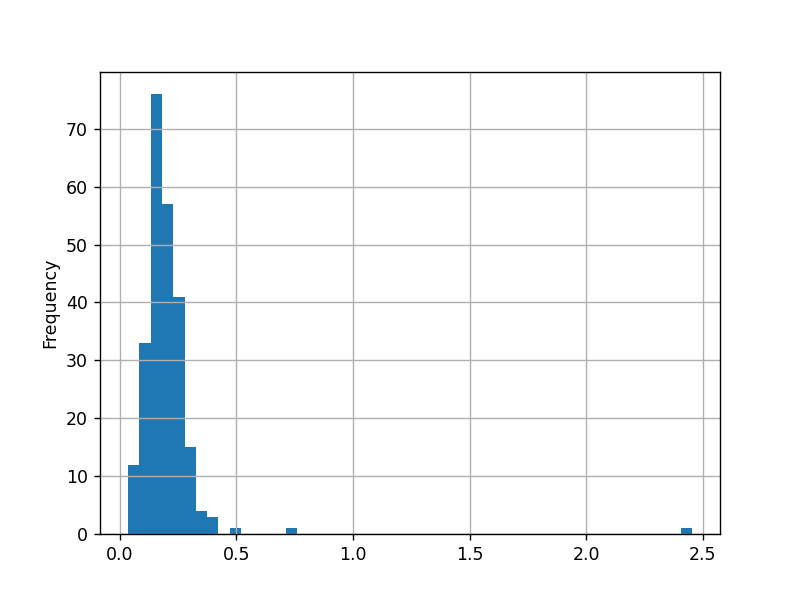

In [13]:
fig, axes = plt.subplots(1, 1)
tips['tip_pct'].plot.hist(bins=50)
plt.grid()

<IPython.core.display.Javascript object>


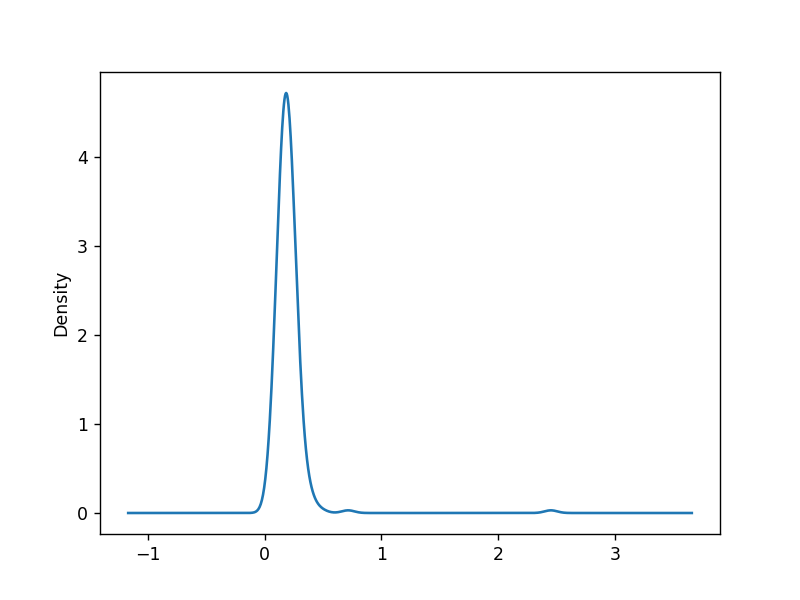

<AxesSubplot:ylabel='Density'>

In [14]:
# 密度圖
fig, axes = plt.subplots(1, 1)
tips['tip_pct'].plot.density()

<IPython.core.display.Javascript object>


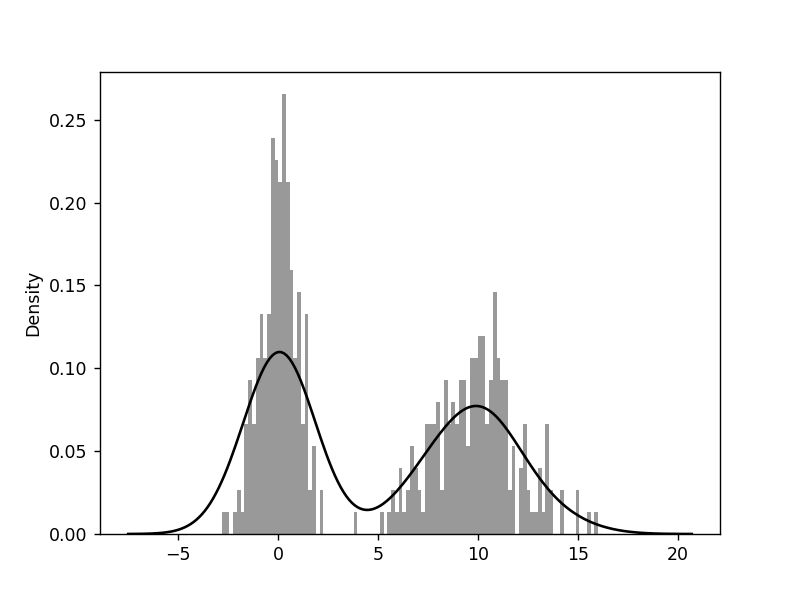

C:\Users\a8803\AppData\Roaming\Python\Python38\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

In [29]:
fig, axes = plt.subplots(1, 1)
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.distplot(values, bins=100, color='k')

### 散佈圖或稱點圖

In [19]:
# 用於觀察二維序列資料
marco = pd.read_csv('examples/macrodata.csv')

In [21]:
# marco.keys()
marco.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


In [23]:
data = marco[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


In [26]:
# np.log(data)

,cpi,m1,tbilrate,unemp
0,3.366606,4.939497,1.036737,1.757858
1,3.372455,4.953712,1.124930,1.629241
2,3.379293,4.945207,1.340250,1.667707
3,3.379974,4.941642,1.465568,1.722767
4,3.385745,4.938781,1.252763,1.648659
...,...,...,...,...
198,5.379386,7.296210,0.157004,1.791759
199,5.357407,7.362962,-2.120264,1.931521
200,5.359746,7.373249,-1.514128,2.091864
201,5.368165,7.410710,-1.714798,2.219203


In [25]:
# np.log(data).diff()

,cpi,m1,tbilrate,unemp
0,NaN,NaN,NaN,NaN
1,0.005849,0.014215,0.088193,-0.128617
2,0.006838,-0.008505,0.215321,0.038466
3,0.000681,-0.003565,0.125317,0.055060
4,0.005772,-0.002861,-0.212805,-0.074108
...,...,...,...,...
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339


In [27]:
# 1.757858 - 1.629241

0.12861699999999998

<IPython.core.display.Javascript object>


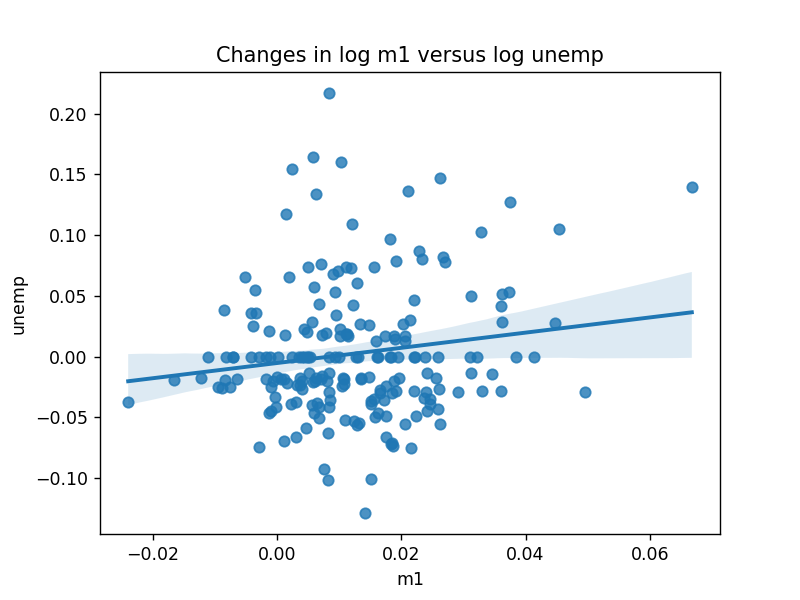

C:\Users\a8803\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

In [31]:
# 畫散佈圖的同時，算出線性回歸線: seabon.regplot
fig, axes = plt.subplots(1, 1)
sns.regplot('m1', 'unemp', data=trans_data)

plt.title('Changes in log %s versus log %s' % ('m1', 'unemp'))

<IPython.core.display.Javascript object>


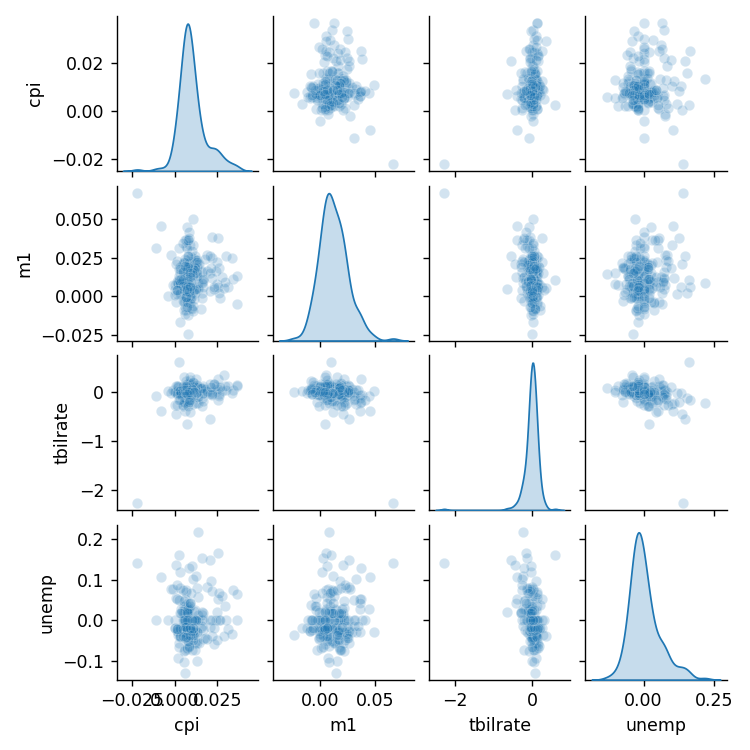

In [39]:
# 散佈圖矩陣
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2}, height=1.5)

### 層面圖組與分組資料

C:\Users\a8803\AppData\Roaming\Python\Python38\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<IPython.core.display.Javascript object>


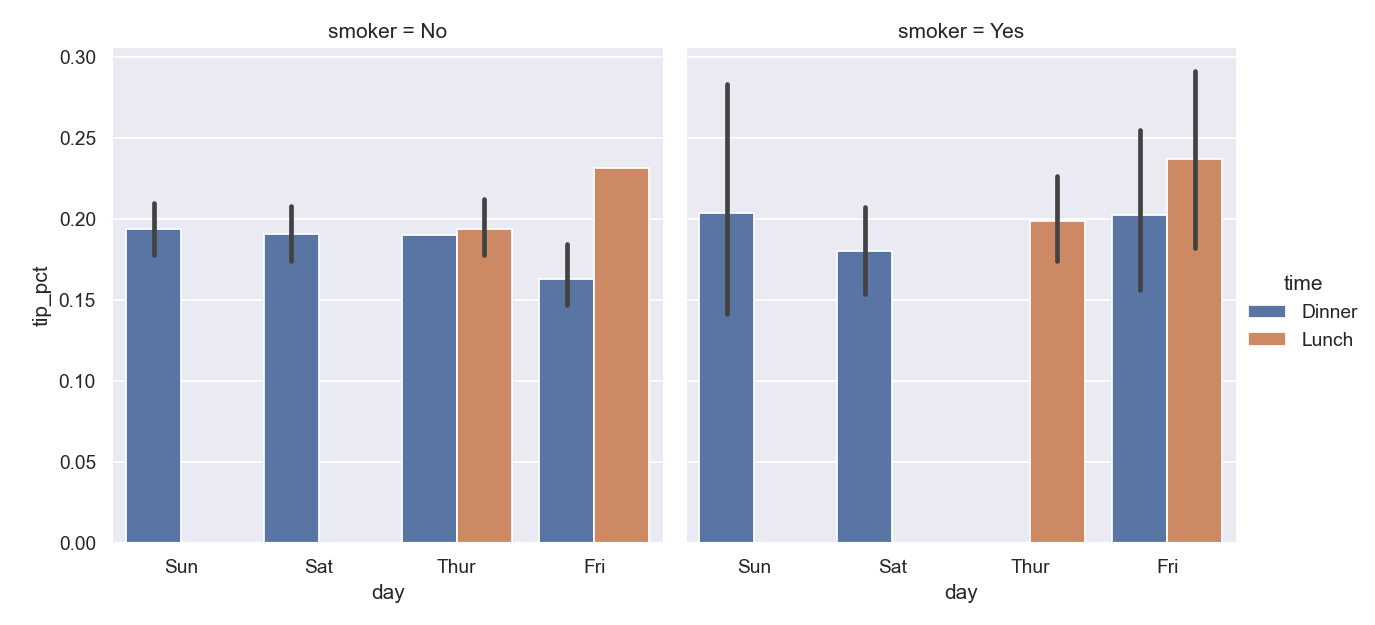

In [45]:
# 碰到多個分組方法的資料集合

sns.factorplot(x='day', y='tip_pct', hue='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])
sns.set(rc = {'figure.figsize':(10,5)})

<IPython.core.display.Javascript object>


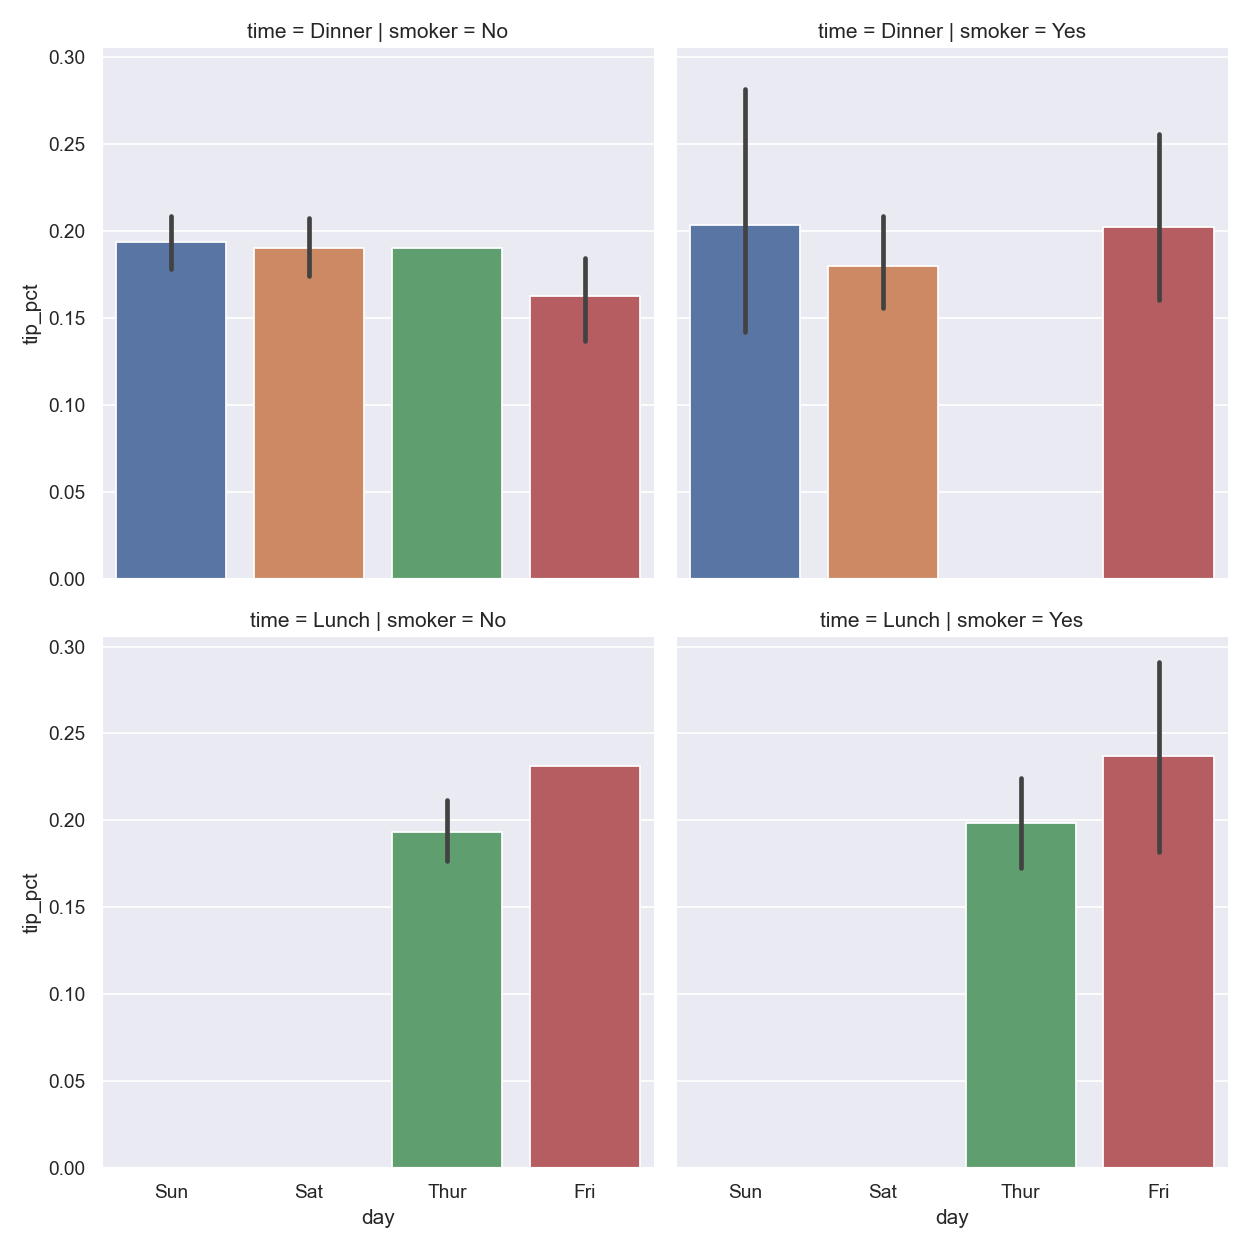

In [49]:
# 將 time分組擴增為新的一列圖
# 以  時間/抽菸與否  作為分層

sns.catplot(x='day', y='tip_pct', row='time', col='smoker', kind='bar', data=tips[tips.tip_pct < 1])

<IPython.core.display.Javascript object>


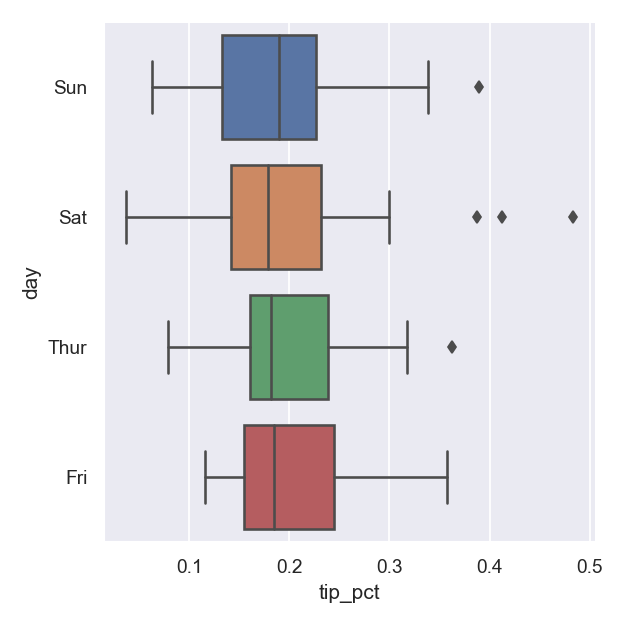

In [50]:
# 箱型圖
sns.catplot(x='tip_pct', y='day', kind='box', data=tips[tips.tip_pct < 0.5])